<a href="https://colab.research.google.com/github/ayten21/Neural-Network-with-Tensorflow-for-Regression/blob/main/NeuralNetworkRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#after importing important libraries, we are creating our own dataset

2.6.0


In [2]:
X = np.arange(-110, 110, 3) 
y = np.arange(-100, 120, 3)

In [37]:
#before we must check the shapesof our input and output data, they must be same
X.shape, y.shape

((74,), (74,))

In [5]:
len(X)
X_train = X[:60]
y_train = y[:60]
X_test = X[60:]
y_test = y[60:]
len(X_train), len(X_test)

(60, 14)

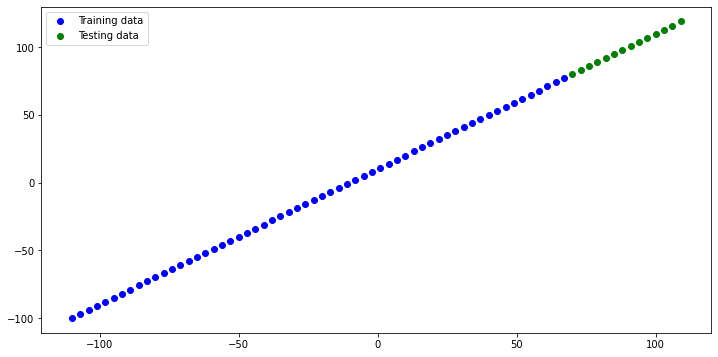

In [38]:
#visualize visualize visualize
plt.figure( figsize = (12,6))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [7]:
tf.random.set_seed(42)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
model.fit( X_train, y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 1s 10ms/step - loss: 14.2691 - mae: 14.2691
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 11.4816 - mae: 11.4816
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 11.9457 - mae: 11.9457
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 11.4454 - mae: 11.4454
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 10.5982 - mae: 10.5982
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 11.0030 - mae: 11.0030
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 14.5564 - mae: 14.5564
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 12.4001 - mae: 12.4001
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 8.9780 - mae: 8.9780
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 10.9169 - mae: 10.9169


In [39]:
model.predict([130])
#the output should have been close to 140, it is not close enough, so let's start to improve our model

array([[126.92796]], dtype=float32)

In [9]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
model_1.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])
model_1.fit( X_train, y_train, epochs = 100, verbose = 0)

In [10]:
preds = model_1.predict(X_test)
preds

array([[ 81.19372 ],
       [ 84.61617 ],
       [ 88.03863 ],
       [ 91.46108 ],
       [ 94.88354 ],
       [ 98.306   ],
       [101.728455],
       [105.15091 ],
       [108.573364],
       [111.99582 ],
       [115.418274],
       [118.84073 ],
       [122.26318 ],
       [125.68564 ]], dtype=float32)

In [40]:
#write a function in order to visualize upcoming models easily
def plot_preds(traindata = X_train,
               trainlabels = y_train,
               testdata = X_test,
               testlabels = y_test,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()

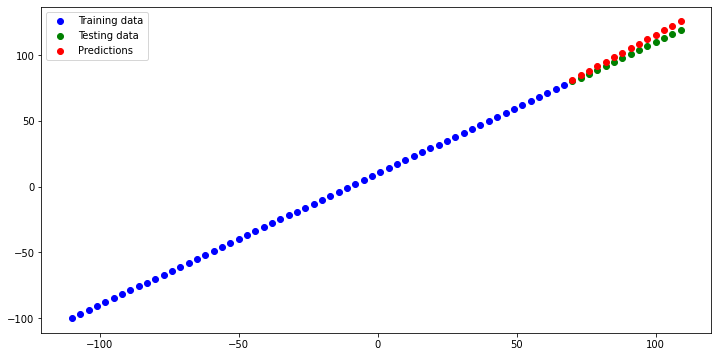

In [12]:
plot_preds(traindata = X_train,
           trainlabels = y_train,
           testdata = X_test,
           testlabels = y_test,
           predictions = preds)

In [41]:
mae = tf.metrics.mean_absolute_error( y_true = y_test,
                                      y_pred = preds)
mae
#mae should have been 1 value, something is wrong, let's check the shapes

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([18.47681 , 15.774162, 13.620784, 12.016679, 10.961846, 10.5     ,
       10.604065, 11.257402, 12.460013, 14.211897, 16.513052, 19.363482,
       22.763184, 26.185638], dtype=float32)>

In [14]:
y_test.shape, preds.shape

((14,), (14, 1))

In [42]:
preds.squeeze().shape
#we erase 1 dimension that way, now we can go on

(14,)

In [16]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds.squeeze()).numpy()
mae, mse

(3.9396794, 18.42119)

In [17]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_2.fit(X_train, y_train, epochs=100, verbose=0)

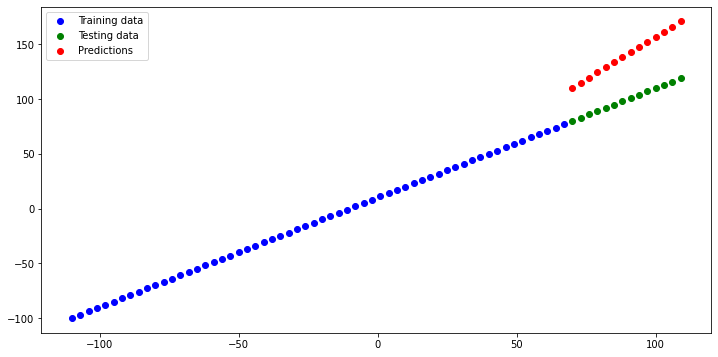

In [18]:
preds_2 = model_2.predict(X_test)
plot_preds(predictions=preds_2)

In [19]:
mae_2 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_2.squeeze()).numpy()
mae_2,mse_2

(41.150764, 1738.0294)

In [20]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [22]:
preds_3 = model_3.predict(X_test)

In [23]:
mae_3 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_3.squeeze()).numpy()
mae_3,mse_3

(39.64795, 1587.9797)

In [24]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_4.fit(X_train, y_train, epochs=100, verbose=0)


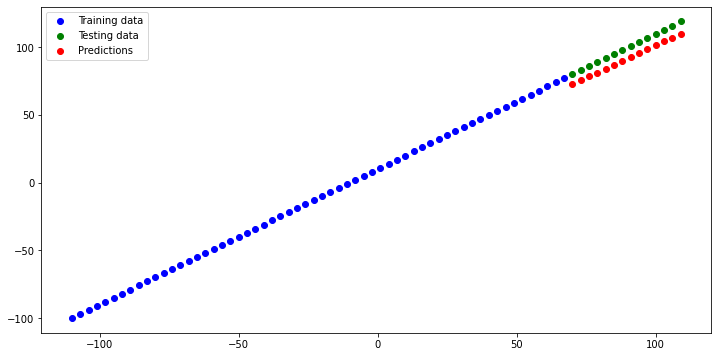

In [25]:
preds_4 = model_4.predict(X_test)
plot_preds(predictions=preds_4)

In [26]:
mae_4 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_4.squeeze()).numpy()
mse_4 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_4.squeeze()).numpy()
mae_4,mse_4

(8.184728, 67.23798)

In [27]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_5.fit(X_train, y_train, epochs=100, verbose=0)

In [28]:
preds_5 = model_5.predict(X_test)

In [29]:
mae_5 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_5.squeeze()).numpy()
mse_5 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_5.squeeze()).numpy()
mae_5, mse_5

(8.17538, 72.70614)

In [30]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_6.fit(X_train, y_train, epochs=100, verbose=0)

In [31]:
preds_6 = model_6.predict(X_test)
mae_6 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=preds_6.squeeze()).numpy()
mse_6 = tf.metrics.mean_squared_error(y_true = y_test,
                                      y_pred=preds_6.squeeze()).numpy()
mae_6, mse_6

(1.4528008, 3.1021771)

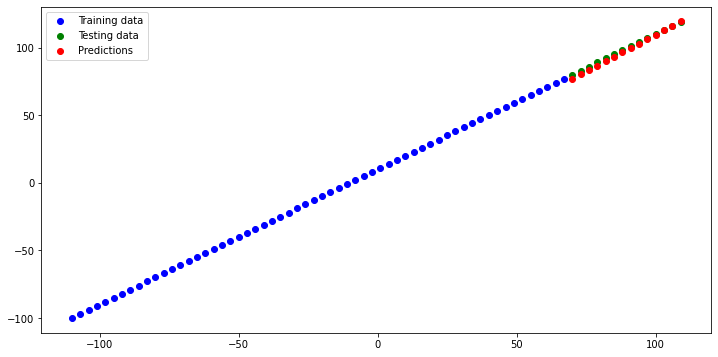

In [43]:
plot_preds(predictions=preds_6)
#almost perfect predictions! ALways keep working, trying and improving, that will work

In [33]:
model_results = [['model_1', mae, mse],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3], 
                 ['model_4', mae_4, mse_4], 
                 ['model_5', mae_5, mse_5],
                 ['model_6', mae_6, mse_6]] 

In [35]:
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,3.939679,18.421190
1,model_2,41.150764,1738.029419
2,model_3,39.647949,1587.979736
3,model_4,8.184728,67.237984
4,model_5,8.175380,72.706139
5,model_6,1.452801,3.102177
